In [7]:
%load_ext autoreload
%autoreload 2

import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json
import random

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
plt.rcParams.update({'font.size': 15})
barwidth = 0.8

In [4]:
'''original txt'''
example = '/home/dashi/lulu/examples/data/MovieSummary_example.txt'
filename = '/home/dashi/lulu/corpus/MovieSummaries/plot_summaries.txt'
articleDir = '/home/dashi/lulu/corpus/MovieSummaries/MovieSummaries-break/'

'''converted article to per txt'''
sampleArt = '/home/dashi/lulu/corpus/MovieSummaries/sample.txt'
sampleDir = '/home/dashi/lulu/corpus/MovieSummaries/MS-sample/'
articleBreakDir = '/home/dashi/lulu/corpus/MovieSummaries/MovieSummaries-artbreak/'
 
# stat emo file
statEmosF =  '/home/dashi/lulu/com_metrics_chatbot/code/analysis/cmu_statEmosF.txt' 

In [5]:
nlp = spacy.load('en_core_web_md')
emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [8]:
# dead kernel error, randomly select 150000 articles comparable to reuter and acl corpus size
all_read_files = glob.glob(articleBreakDir + '*.txt')
N = len(all_read_files)
print(N)
p = 15000*1.0/N*100

read_files = []
for file in all_read_files: 
    coin = random.randint(1, 100)
    if coin < p: 
        read_files.append(file)
N = len(read_files)
print(N)

42300
14744


In [ ]:
parsed_text = 'This is an awesome sentence. Where is the best cat?'
doc = nlp(parsed_text)
s = analyzeWordSize(doc)
print(len(doc.vocab))
print(s)
score = scoreEmotion(doc, emos)
print(score)

In [ ]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter = analyzePOS(doc)
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [10]:
'''
Emotion words histogram
'''  
countersEmos, sizesEmos = docTermFreq(read_files, emos)

14744
14744


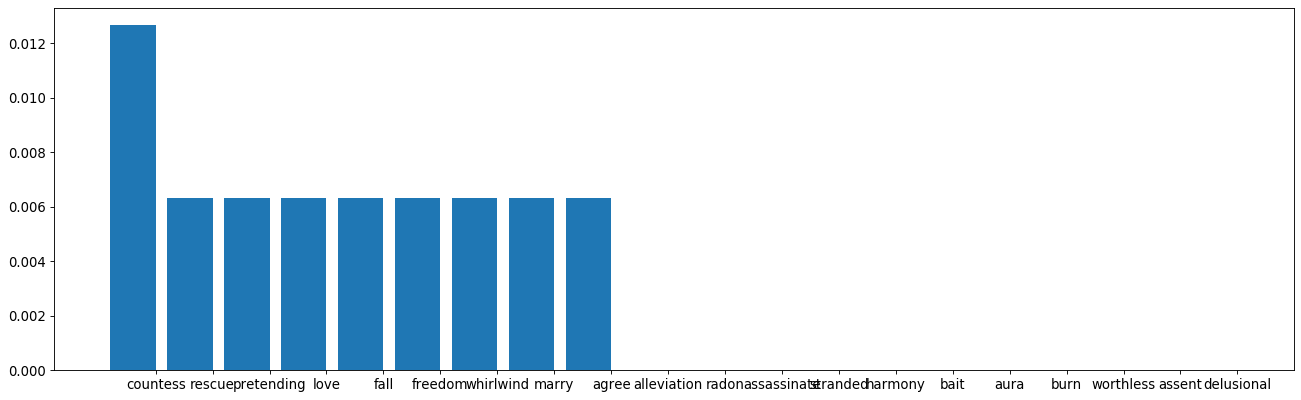

In [11]:
print(len(countersEmos))
print(len(sizesEmos))

plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(countersEmos[0])
values = [v*1.0/sizesEmos[1] for v in values]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels) 
plt.show()

In [12]:
tfsEmos = termFreq(countersEmos, sizesEmos)
counterEmos, szEmos = docFreq(countersEmos)
idfEmos = invDocFreq(counterEmos, szEmos)
tiEmos = tfIdf(tfsEmos, idfEmos) 

In [13]:
i = 0
totWords = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        totWords += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0
i : 5000
i : 10000


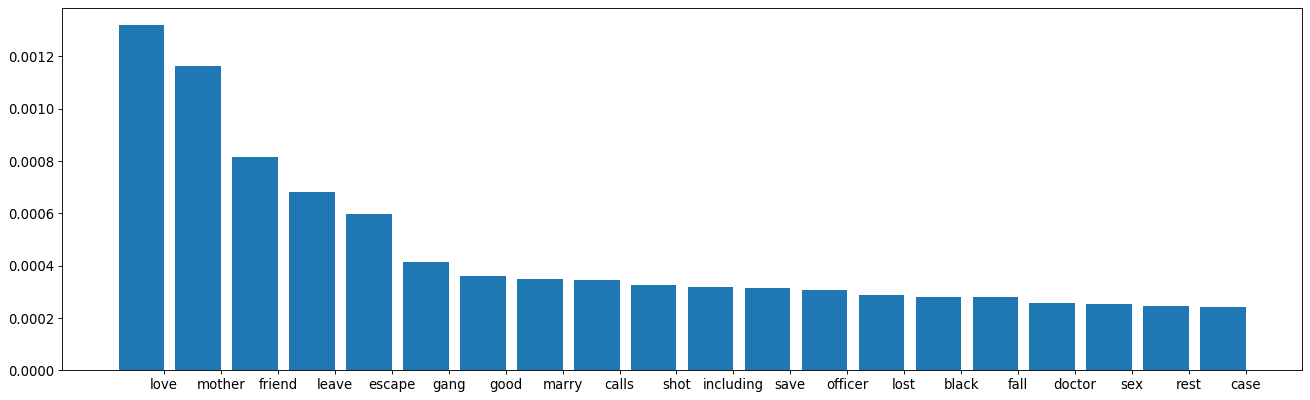

In [14]:
# print(len(tiEmos)) 
# d = sortByValue(tiEmos[1])
# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# labels, values = list(d.keys())[:20], list(d.values())[:20]
# indexes = np.arange(len(labels)) 
# plt.bar(indexes, values, barwidth)
# plt.xticks(indexes + barwidth * 0.5, labels)
# plt.savefig('cmu_emos_df.eps', format='eps')
# plt.show()

# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# labels, values = rankCounter(counterEmos)
# values = np.array(values)*1.0/sum(counterNegPron.values())
# indexes = np.arange(len(labels)) 
# plt.bar(indexes, values, barwidth)
# plt.xticks(indexes + barwidth * 0.5, labels)
# plt.savefig('cmu_emos_df.eps', format='eps')
# plt.show()

plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
values = [v*1.0/totWords for v in values]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('cmu_emos_df.eps', format='eps')
plt.show()

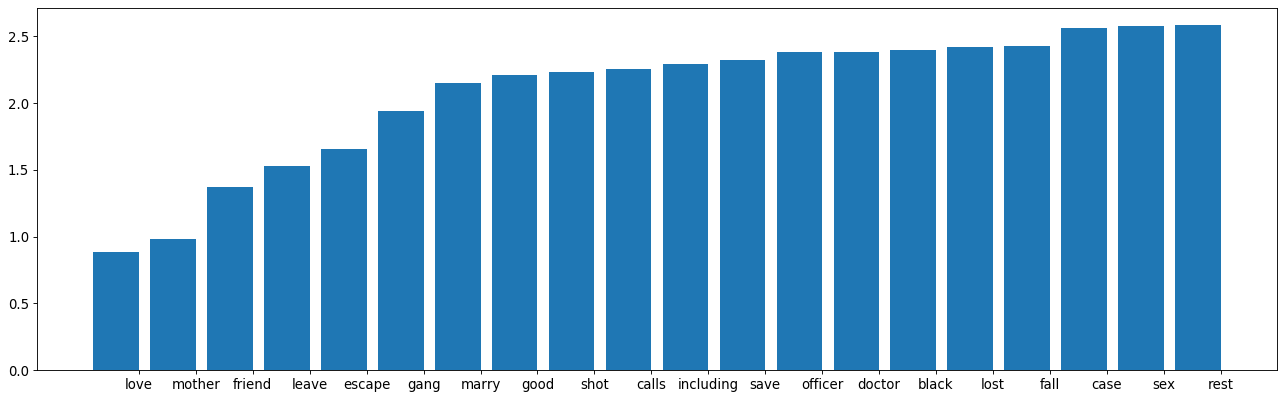

In [15]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
result = {k: v for k, v in sorted(idfEmos.items(), key=lambda item: item[1])}
labels = list(result.keys())[:20]
values = list(result.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('cmu_emos_idf.eps', format='eps')
plt.show()

In [16]:
'''
Verb category histogram
''' 
countersAct = []
countersLink = []
countersHelp = [] 
countersHM = []

szAct = []
szLink = []
szHelp = []
szHM = []

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        countersAct.append(a)
        countersLink.append(b) 
        countersHelp.append(c) 
        countersHM.append(d) 
        
        szAct.append(sum(a.values()))
        szLink.append(sum(b.values()))
        szHelp.append(sum(c.values()))
        szHM.append(sum(d.values()))
        
print(sum(np.array(szAct)))
print(sum(np.array(szLink)))
print(sum(np.array(szHelp)))

430624
67912
84089


[0.73911006 0.11656211 0.14432783]


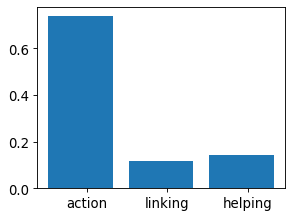

In [17]:
x = np.array([sum(np.array(szAct)), sum(np.array(szLink)), sum(np.array(szHelp))])
# values  
values = x*1.0/sum(x)
print(values)
labels = ["action", "linking", "helping"]
indexes = np.arange(len(labels))
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k') 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.1, labels)
plt.savefig('cmu_verbcat_pc.eps', format='eps')
plt.show()

[430624  67912  84089]


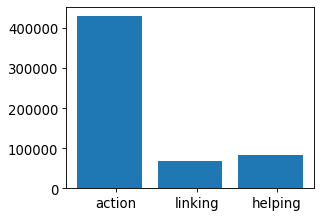

In [18]:
x = np.array([sum(np.array(szAct)), sum(np.array(szLink)), sum(np.array(szHelp))])
values = x
# values = x*1.0/sum(x)
print(values)
labels = ["action", "linking", "helping"]
indexes = np.arange(len(labels))
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k') 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.1, labels)
plt.savefig('cmu_verbcat_ct.eps', format='eps')
plt.show()

In [19]:
'''
Pronoun histogram
Percentage of punctuation out of total number of words
''' 
countersPron = []
counterPron = Counter()

for infile in read_files: 
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        c = analyzePronoun(doc)
        counterPron += c
        countersPron.append(c) 

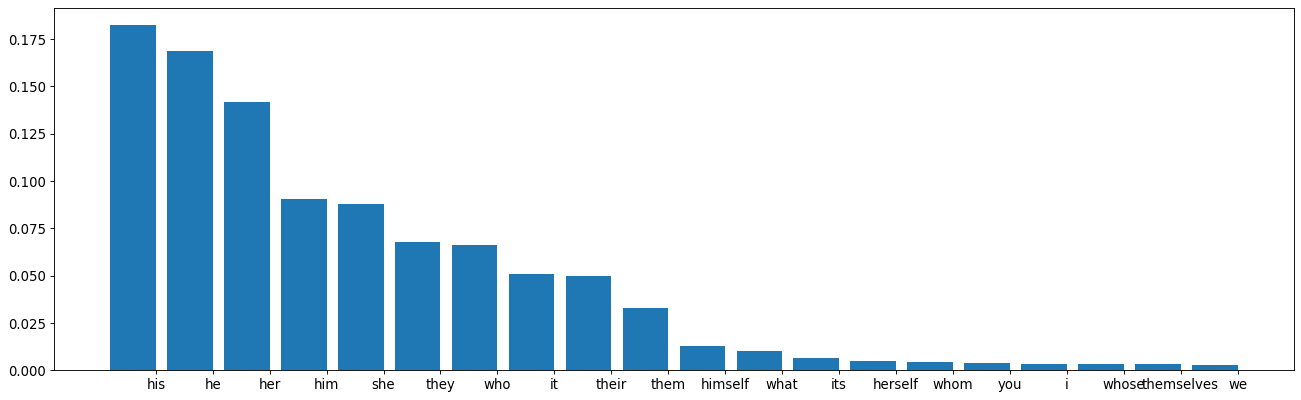

In [20]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPron)
values = np.array(values)*1.0/sum(counterPron.values())
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('cmu_pron_df.eps', format='eps')
plt.show()

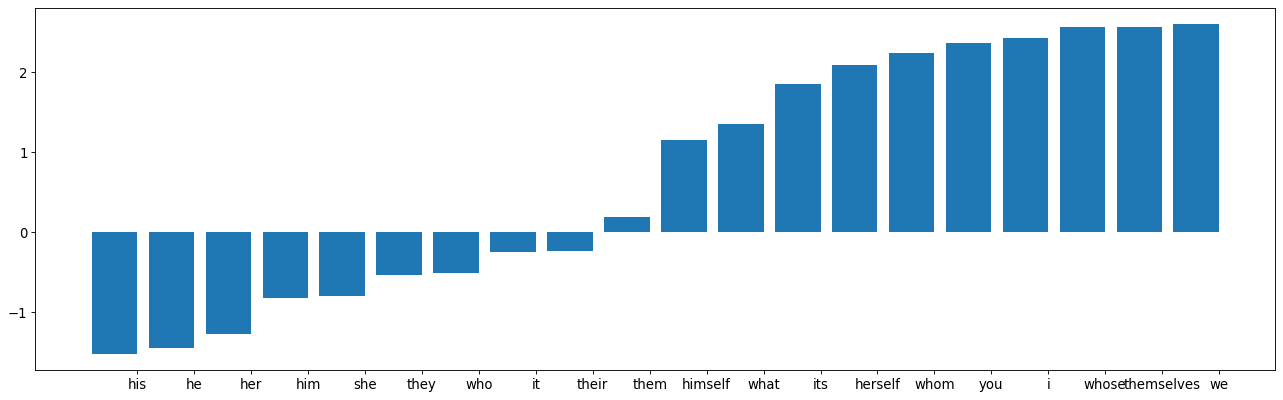

In [21]:
counterPronIdf = invDocFreq(counterPron, N)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
result = {k: v for k, v in sorted(counterPronIdf.items(), key=lambda item: item[1])}
labels = list(result.keys())[:20]
values = list(result.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('cmu_pron_idf.eps', format='eps')
plt.show()

In [ ]:
'''
Pronoun, personal histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRP += analyzePronounPRP(doc) 
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb category histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterVerbAct = Counter('')
counterVerbLink = Counter('')
counterVerbHelp = Counter('')
counterVerbHM = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        counterVerbAct += a
        counterVerbLink += b
        counterVerbHelp += c
        counterVerbHM += d
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterVerbAct)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
CounterVerbCategories = Counter({'Action' : sumCounter(counterVerbAct), 
                         'Linking' : sumCounter(counterVerbLink), 
                         'Helping' : sumCounter(counterVerbHelp),
                         'Modal' : sumCounter(counterVerbHM)})
Total = sumCounter(CounterVerbCategories)

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterVerbCategories)
values = (int(float(v)*100/Total) for v in values)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()


In [ ]:
CounterVerbCategories = Counter({'Action' : sumCounter(counterVerbAct), 
                         'Linking' : sumCounter(counterVerbLink), 
                         'Helping' : sumCounter(counterVerbHelp)})

Total = sumCounter(CounterVerbCategories)

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterVerbCategories)
values = [int(float(v)*100/Total) for v in values]
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.show()


In [ ]:
'''
Article score distribution
Fraction of emotional words out of total number of words in an article 
'''
read_files = glob.glob(directory + '*.txt')

scoreDF = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        scoreDF.append(doc)
        if (i % 1000 == 0): 
            print(i)
        i += 1
    
# plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# labels, values = rankCounter(counterPronPRP)
# indexes = np.arange(len(labels))
# width = 1
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)
# plt.show()

In [22]:
'''
Emotion words histogram
'''
countersEmos = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        countersEmos.append(analyzeEmotionWords(doc, emos))
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1

i : 0
i : 5000
i : 10000


In [23]:
emosScore = []

for counter in countersEmos: 
    emosScore.append(sum(counter.values()))
 
emosScore = np.array(emosScore)

In [24]:
import pandas as pd
import seaborn as sns 
from scipy import stats

In [25]:
stats.describe(emosScore) 

DescribeResult(nobs=14849, minmax=(0, 209), mean=11.84786854333625, variance=157.0213722413387, skewness=2.6147671707810516, kurtosis=15.42821513830134)

ValueError: `bins` must increase monotonically, when an array

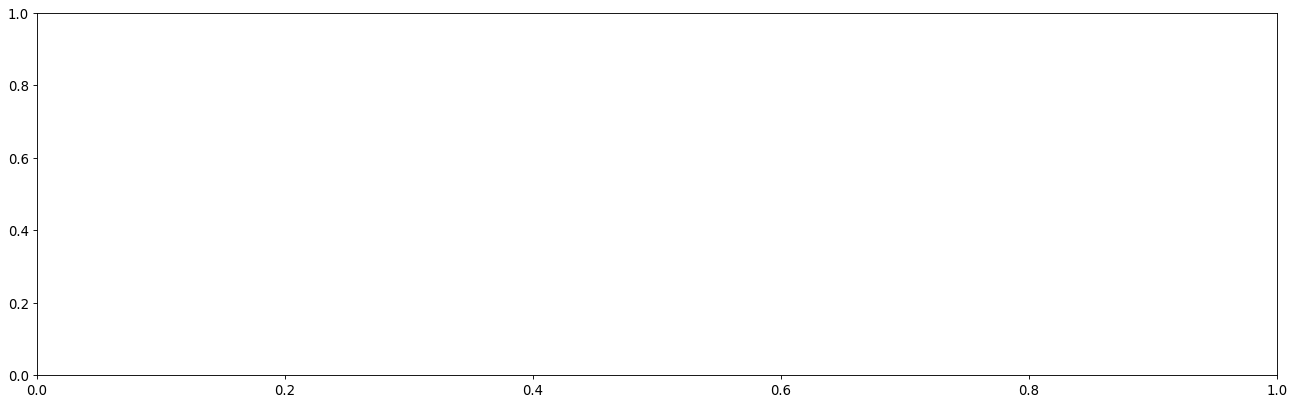

In [40]:
binwidth = 2
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(emosScore, density=True, bins=(min(emosScore), max(emosScore), 100))  # `density=False` would make counts
plt.savefig('cmu_emos_scores.eps', format='eps')
plt.show()

In [34]:
'''
Emotion words histogram
'''
wordSize = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        wordSize.append(len(text.split()))

In [35]:
emosScoreF = [] 
for i in range(len(emosScore)):
    emosScoreF.append(emosScore[i]*1.0/wordSize[i])

In [36]:
stats.describe(emosScoreF)

DescribeResult(nobs=14849, minmax=(0.0, 0.2222222222222222), mean=0.040495937546104935, variance=0.00045749581050585463, skewness=1.3120858902326704, kurtosis=4.905873726102103)

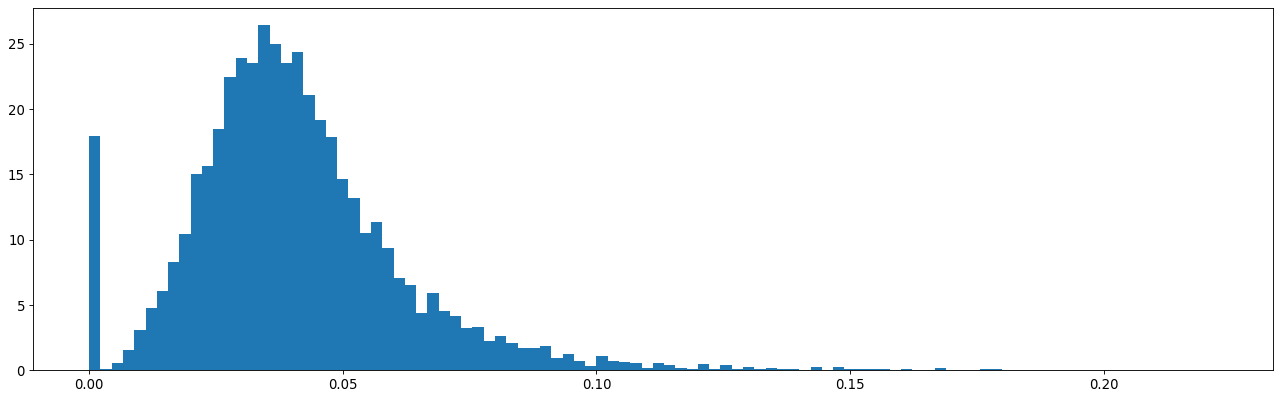

In [39]:
binwidth = 1
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(emosScoreF, density=True, bins=100)  # `density=False` would make counts
plt.savefig('cmu_emos_scoresF.eps', format='eps')
plt.show()

In [37]:
len(read_files)

94

In [43]:
np.savetxt(statEmosF, emosScoreF, fmt="%f")

In [44]:
acl_emosScoreF = np.loadtxt('/home/dashi/lulu/com_metrics_chatbot/code/analysis/statPosEmosF.txt', dtype=float)

In [45]:
stats.mannwhitneyu(emosScoreF, acl_emosScoreF)

MannwhitneyuResult(statistic=84121164.0, pvalue=5.665246477446608e-41)